# Research Questions

## RQ6. Was the school dropout rate the same in public and private schools?

## RQ7. Was the school dropout rate the same in urban and rural schools?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
final_performance_school_dropout = pd.read_csv('data/final_performance_school_dropout.csv')

In [4]:
final_performance_school_dropout.head()

,Ano,Rede,Localização,1EF,2EF,3EF,4EF,5EF,6EF,7EF,8EF,9EF,Total - EF,1EM,2EM,3EM,4EM,Não-Seriado,Total - EM
0,2007,Estadual,Rural,3.600000,6.3,4.1,4.2,4.9,7.4,6.900000,6.5,6.7,6.0,18.3,14.1,10.2,10.200000,15.500000,14.9
1,2007,Federal,Rural,1.358704,0.0,0.0,0.0,0.0,0.0,3.046215,4.8,0.0,1.4,5.0,1.8,0.8,5.695618,3.000000,2.9
2,2007,Municipal,Rural,4.300000,7.5,5.2,5.6,5.8,11.3,9.600000,9.7,8.3,7.0,19.0,13.4,8.4,3.700000,11.700000,14.7
3,2007,Privada,Rural,1.300000,2.5,1.8,1.3,1.2,3.1,2.200000,2.1,1.2,1.9,2.7,1.2,0.8,2.200000,9.516116,1.7
4,2007,Pública,Rural,4.300000,7.4,5.1,5.5,5.7,10.6,9.100000,9.0,7.9,6.9,17.8,13.5,9.6,7.200000,11.800000,14.3


In [5]:
final_performance_school_dropout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ano          252 non-null    int64  
 1   Rede         252 non-null    object 
 2   Localização  252 non-null    object 
 3   1EF          252 non-null    float64
 4   2EF          252 non-null    float64
 5   3EF          252 non-null    float64
 6   4EF          252 non-null    float64
 7   5EF          252 non-null    float64
 8   6EF          252 non-null    float64
 9   7EF          252 non-null    float64
 10  8EF          252 non-null    float64
 11  9EF          252 non-null    float64
 12  Total - EF   252 non-null    float64
 13  1EM          252 non-null    float64
 14  2EM          252 non-null    float64
 15  3EM          252 non-null    float64
 16  4EM          252 non-null    float64
 17  Não-Seriado  252 non-null    float64
 18  Total - EM   252 non-null    float64
dtypes: float

In [49]:
def plot_mean(dataset, mean, label, colorText, colorBackground):
    plt.axhline(y=mean, label=label, color=colorBackground, linestyle='--')
    plt.text(2020+x_2020_shift, mean-y_2020_shift, '{:.1f}%'.format(mean), color=colorText).set_backgroundcolor(colorBackground)

In [6]:
public_EF = final_performance_school_dropout.query('Rede == "Pública" and Localização == "Total"')['Total - EF']
public_EM = final_performance_school_dropout.query('Rede == "Pública" and Localização == "Total"')['Total - EM']
private_EF = final_performance_school_dropout.query('Rede == "Privada" and Localização == "Total"')['Total - EF']
private_EM = final_performance_school_dropout.query('Rede == "Privada" and Localização == "Total"')['Total - EM']
years = final_performance_school_dropout['Ano'].unique()

In [10]:
mean_bp_public_EF = public_EF[:-1].mean()
mean_bp_public_EM = public_EM[:-1].mean()
mean_bp_private_EF = private_EF[:-1].mean()
mean_bp_private_EM = private_EM[:-1].mean()

In [36]:
marker = 'o','s'
x_shift = 0.13
y_shift = 0.15
markersize=9

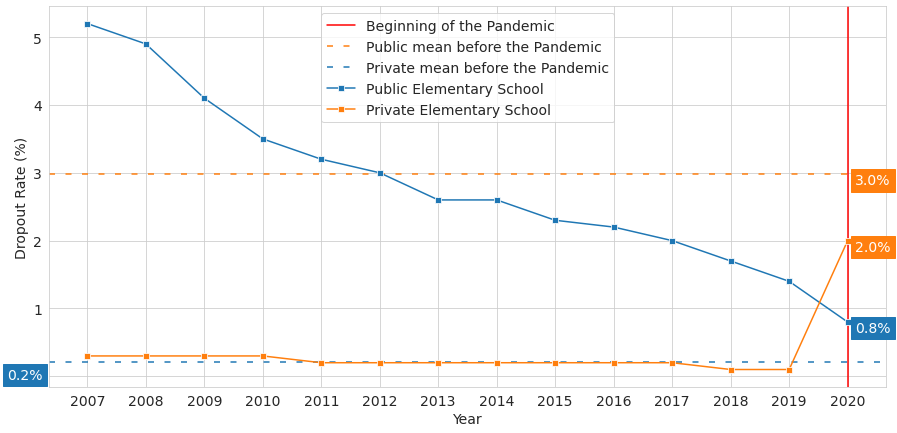

In [90]:
plt.figure(figsize=(15,7))
sns.set_style("whitegrid")

plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
plt.axhline(y=mean_bp_public_EF, color='tab:orange', linestyle='dashed', dashes=(4, 7),
            label="Public mean before the Pandemic")
plt.text(2020 + x_shift, mean_bp_public_EF - y_shift, '{:.1f}%'.format(mean_bp_public_EF), 
         color='white').set_backgroundcolor('tab:orange')
plt.axhline(y=mean_bp_private_EF, color='tab:blue', linestyle='dashed', dashes=(4, 7),
            label="Private mean before the Pandemic")
plt.text(2005.5 + x_shift, mean_bp_private_EF - y_shift - 0.1, '{:.1f}%'.format(mean_bp_private_EF), 
         color='white').set_backgroundcolor('tab:blue')

ax_es = sns.lineplot(x=years, y=public_EF, label="Public Elementary School",marker='s')
ax_es.set(xticks=years)

ax_hs = sns.lineplot(x=years, y=private_EF, label="Private Elementary School",marker='s')
ax_hs.set(xticks=years)

plt.ylabel("Dropout Rate (%)")
plt.xlabel("Year")

y_2020_public = final_performance_school_dropout.query('Ano == 2020 & Rede == "Pública" & Localização == "Total"')['Total - EF'].iloc[0]
plt.text(2020 + x_shift, y_2020_public - y_shift, '{:.1f}%'.format(y_2020_public), color='white').set_backgroundcolor('tab:blue')

y_2020_private = final_performance_school_dropout.query('Ano == 2020 & Rede == "Privada" & Localização == "Total"')['Total - EF'].iloc[0]
plt.text(2020 + x_shift, y_2020_private - y_shift, '{:.1f}%'.format(y_2020_private), color='white').set_backgroundcolor('tab:orange')

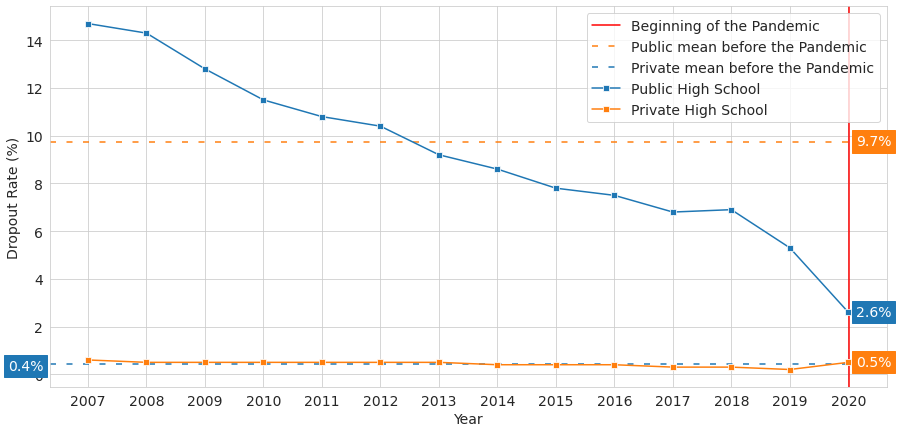

In [91]:
plt.figure(figsize=(15,7))
sns.set_style("whitegrid")

plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
plt.axhline(y=mean_bp_public_EM, color='tab:orange', linestyle='dashed', dashes=(4, 7),
            label="Public mean before the Pandemic")
plt.text(2020 + x_shift, mean_bp_public_EM - y_shift, '{:.1f}%'.format(mean_bp_public_EM), 
         color='white').set_backgroundcolor('tab:orange')
plt.axhline(y=mean_bp_private_EM, color='tab:blue', linestyle='dashed', dashes=(4, 7),
            label="Private mean before the Pandemic")
plt.text(2005.5 + x_shift, mean_bp_private_EM - y_shift - 0.1, '{:.1f}%'.format(mean_bp_private_EM), 
         color='white').set_backgroundcolor('tab:blue')

ax_es = sns.lineplot(x=years, y=public_EM, label="Public High School",marker='s')
ax_es.set(xticks=years)

ax_hs = sns.lineplot(x=years, y=private_EM, label="Private High School",marker='s')
ax_hs.set(xticks=years)

plt.ylabel("Dropout Rate (%)")
plt.xlabel("Year")

y_2020_public = final_performance_school_dropout.query('Ano == 2020 & Rede == "Pública" & Localização == "Total"')['Total - EM'].iloc[0]
plt.text(2020 + x_shift, y_2020_public - y_shift, '{:.1f}%'.format(y_2020_public), color='white').set_backgroundcolor('tab:blue')

y_2020_private = final_performance_school_dropout.query('Ano == 2020 & Rede == "Privada" & Localização == "Total"')['Total - EM'].iloc[0]
plt.text(2020 + x_shift, y_2020_private - y_shift, '{:.1f}%'.format(y_2020_private), color='white').set_backgroundcolor('tab:orange')

In [56]:
rural_EF = final_performance_school_dropout.query('Localização == "Rural" and Rede == "Total"')['Total - EF']
rural_EM = final_performance_school_dropout.query('Localização == "Rural" and Rede == "Total"')['Total - EM']
urban_EF = final_performance_school_dropout.query('Localização == "Urbana" and Rede == "Total"')['Total - EF']
urban_EM = final_performance_school_dropout.query('Localização == "Urbana" and Rede == "Total"')['Total - EM']

In [57]:
mean_bp_rural_EF = rural_EF[:-1].mean()
mean_bp_rural_EM = rural_EM[:-1].mean()
mean_bp_urban_EF = urban_EF[:-1].mean()
mean_bp_urban_EM = urban_EM[:-1].mean()

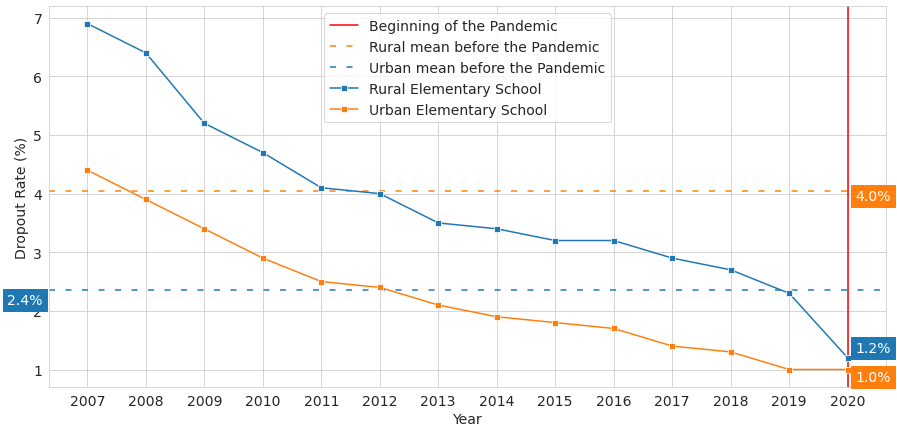

In [102]:
plt.figure(figsize=(15,7))
sns.set_style("whitegrid")

plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
plt.axhline(y=mean_bp_rural_EF, color='tab:orange', linestyle='dashed', dashes=(4, 7),
            label="Rural mean before the Pandemic")
plt.text(2020 + x_shift, mean_bp_rural_EF - y_shift, '{:.1f}%'.format(mean_bp_rural_EF), 
         color='white').set_backgroundcolor('tab:orange')
plt.axhline(y=mean_bp_urban_EF, color='tab:blue', linestyle='dashed', dashes=(4, 7),
            label="Urban mean before the Pandemic")
plt.text(2005.5 + x_shift, mean_bp_urban_EF - y_shift - 0.1, '{:.1f}%'.format(mean_bp_urban_EF), 
         color='white').set_backgroundcolor('tab:blue')

ax_es = sns.lineplot(x=years, y=rural_EF, label="Rural Elementary School",marker='s')
ax_es.set(xticks=years)

ax_hs = sns.lineplot(x=years, y=urban_EF, label="Urban Elementary School",marker='s')
ax_hs.set(xticks=years)

plt.ylabel("Dropout Rate (%)")
plt.xlabel("Year")

y_2020_rural = final_performance_school_dropout.query('Ano == 2020 & Localização == "Rural" & Rede == "Total"')['Total - EF'].iloc[0]
plt.text(2020 + x_shift, y_2020_rural + 0.1, '{:.1f}%'.format(y_2020_rural), color='white').set_backgroundcolor('tab:blue')

y_2020_urban = final_performance_school_dropout.query('Ano == 2020 & Localização == "Urbana" and Rede == "Total"')['Total - EF'].iloc[0]
plt.text(2020 + x_shift, y_2020_urban - 0.2, '{:.1f}%'.format(y_2020_urban), color='white').set_backgroundcolor('tab:orange')

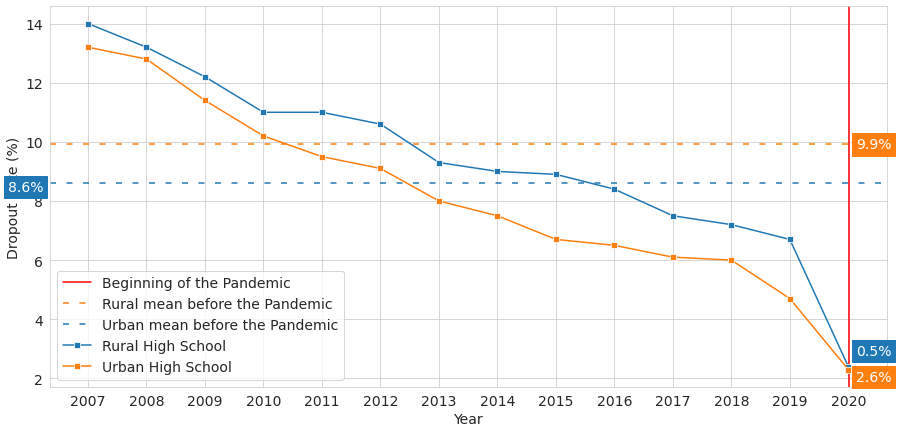

In [109]:
plt.figure(figsize=(15,7))
sns.set_style("whitegrid")

plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
plt.axhline(y=mean_bp_rural_EM, color='tab:orange', linestyle='dashed', dashes=(4, 7),
            label="Rural mean before the Pandemic")
plt.text(2020 + x_shift, mean_bp_rural_EM - y_shift, '{:.1f}%'.format(mean_bp_rural_EM), 
         color='white').set_backgroundcolor('tab:orange')
plt.axhline(y=mean_bp_urban_EM, color='tab:blue', linestyle='dashed', dashes=(4, 7),
            label="Urban mean before the Pandemic")
plt.text(2005.5 + x_shift, mean_bp_urban_EM - y_shift - 0.1, '{:.1f}%'.format(mean_bp_urban_EM), 
         color='white').set_backgroundcolor('tab:blue')

ax_es = sns.lineplot(x=years, y=rural_EM, label="Rural High School",marker='s')
ax_es.set(xticks=years)

ax_hs = sns.lineplot(x=years, y=urban_EM, label="Urban High School",marker='s')
ax_hs.set(xticks=years)

plt.ylabel("Dropout Rate (%)")
plt.xlabel("Year")

y_2020_rural = final_performance_school_dropout.query('Ano == 2020 & Rede == "Total" & Localização == "Rural"')['Total - EM'].iloc[0]
plt.text(2020 + x_shift, y_2020_rural - 0.5, '{:.1f}%'.format(y_2020_public), color='white').set_backgroundcolor('tab:orange')

y_2020_urban = final_performance_school_dropout.query('Ano == 2020 & Rede == "Total" & Localização == "Urbana"')['Total - EM'].iloc[0]
plt.text(2020 + x_shift, y_2020_urban + 0.5, '{:.1f}%'.format(y_2020_private), color='white').set_backgroundcolor('tab:blue')